# 笹川真生とキタニタツヤの顔画像を見分けるAIを作る(CNN)
笹川真生 -> https://www.youtube.com/channel/UCd0oSpX1KiQ0pBl8g4XcwOQ/videos  
キタニタツヤ -> https://www.youtube.com/channel/UCgP3GbgbuVzAhlctGU5yuPA

# 前準備

In [104]:
import numpy as np
import pandas as pd
import glob

In [105]:
# .jpgのファイル全てのpathをリストに格納
jpg_mao = glob.glob("D:/mao/*.jpg")
jpg_mao

['D:/mao\\mao(1).jpg',
 'D:/mao\\mao(10).jpg',
 'D:/mao\\mao(100).jpg',
 'D:/mao\\mao(101).jpg',
 'D:/mao\\mao(102).jpg',
 'D:/mao\\mao(103).jpg',
 'D:/mao\\mao(104).jpg',
 'D:/mao\\mao(105).jpg',
 'D:/mao\\mao(106).jpg',
 'D:/mao\\mao(107).jpg',
 'D:/mao\\mao(108).jpg',
 'D:/mao\\mao(109).jpg',
 'D:/mao\\mao(11).jpg',
 'D:/mao\\mao(110).jpg',
 'D:/mao\\mao(111).jpg',
 'D:/mao\\mao(112).jpg',
 'D:/mao\\mao(113).jpg',
 'D:/mao\\mao(114).jpg',
 'D:/mao\\mao(115).jpg',
 'D:/mao\\mao(116).jpg',
 'D:/mao\\mao(117).jpg',
 'D:/mao\\mao(118).jpg',
 'D:/mao\\mao(119).jpg',
 'D:/mao\\mao(12).jpg',
 'D:/mao\\mao(120).jpg',
 'D:/mao\\mao(121).jpg',
 'D:/mao\\mao(122).jpg',
 'D:/mao\\mao(123).jpg',
 'D:/mao\\mao(124).jpg',
 'D:/mao\\mao(125).jpg',
 'D:/mao\\mao(126).jpg',
 'D:/mao\\mao(127).jpg',
 'D:/mao\\mao(128).jpg',
 'D:/mao\\mao(129).jpg',
 'D:/mao\\mao(13).jpg',
 'D:/mao\\mao(130).jpg',
 'D:/mao\\mao(131).jpg',
 'D:/mao\\mao(132).jpg',
 'D:/mao\\mao(133).jpg',
 'D:/mao\\mao(134).jpg',
 'D:/m

In [106]:
# 読み込んだファイルの数を確認
print(np.array(jpg_mao).shape)

(200,)


In [107]:
import matplotlib.pyplot as plt
import cv2

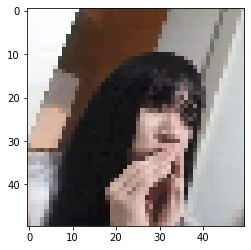

In [113]:
# 画像を50x50で表示
img = cv2.imread("D:/mao\\mao(107).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # BGRで読み込まれているのでRGBに変換しなおす
img = cv2.resize(img, (50, 50))    # 50x50にリサイズ

plt.imshow(img)
plt.show()

In [114]:
img

array([[[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [158, 158, 151],
        [162, 158, 153],
        [200, 201, 194]],

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [161, 161, 153],
        [164, 163, 158],
        [218, 217, 214]],

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [161, 160, 151],
        [181, 181, 173],
        [216, 217, 214]],

       ...,

       [[198, 192, 196],
        [210, 208, 213],
        [211, 214, 225],
        ...,
        [186, 185, 183],
        [182, 180, 181],
        [158, 156, 157]],

       [[185, 173, 171],
        [209, 203, 207],
        [207, 206, 212],
        ...,
        [177, 177, 179],
        [158, 157, 155],
        [139, 138, 136]],

       [[179, 164, 159],
        [209, 203, 207],
        [200, 201, 206],
        ...,
        [166, 164, 165],
        [148, 147, 145],
        [122, 121, 119]]

In [115]:
img.shape

(50, 50, 3)

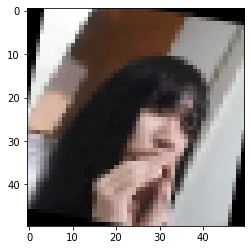

In [116]:
# 画像の回転
center = (25, 25) # 回転の中心
angle = - 10.0     # 回転の角度 
scale = 1.0       # 変化後の大きさ

trans = cv2.getRotationMatrix2D(center, angle, scale)
img_rotate = cv2.warpAffine(img, trans, (50, 50))

plt.imshow(img_rotate)
plt.show()

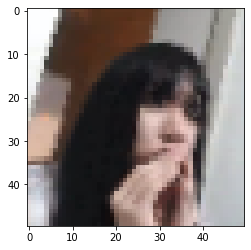

In [118]:
# 画像の回転
center = (25, 25) # 回転の中心
angle = 5.0     # 回転の角度 
scale = 1.1     # 変化後の大きさ

trans = cv2.getRotationMatrix2D(center, angle, scale)
img_rotate = cv2.warpAffine(img, trans, (50, 50))

plt.imshow(img_rotate)
plt.show()

# maoデータ拡張

In [1]:
import numpy as np
import pandas as pd
import glob
import cv2

In [2]:
# mao画像のファイルのpathをリストに格納
path_mao = glob.glob("C:/Users/kisho/Desktop/mao/*.jpg")
path_mao

['C:/Users/kisho/Desktop/mao\\mao(1).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(10).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(100).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(101).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(102).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(103).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(104).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(105).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(106).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(107).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(108).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(109).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(11).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(110).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(111).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(112).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(113).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(114).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(115).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(116).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(117).jpg',
 'C:/Users/kisho/Desktop/mao\\mao(118).jpg',
 'C:/Users/kis

In [3]:
# 200枚の画像を読み込んでいることを確認
np.array(path_mao).shape

(200,)

# 回転によるデータ拡張

In [4]:
# -20~20度回転した画像データをmaoに格納 200 x 41 = 8200
mao = []

center = (25, 25)
angles = list(range(-20, 21, 1))    # -20~20度の回転
size = (50, 50)

for i in range(200):
    
    img = cv2.imread(path_mao[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    
    # 回転によって黒色の背景が出てくるが、それをなくすために拡大
    for angle in angles:
        
        if angle <= -10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)    # 1.3倍
            img_rotate = cv2.warpAffine(img, trans, size)
            mao.append(img_rotate)
        
        elif -10 < angle <= 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.15)    #1.15倍
            img_rotate = cv2.warpAffine(img, trans, size)
            mao.append(img_rotate)
            
        elif angle > 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)    # 1.3倍
            img_rotate = cv2.warpAffine(img, trans, size)
            mao.append(img_rotate)

In [18]:
# 拡張後のデータ数を確認
np.array(mao).shape

(8200, 50, 50, 3)

In [19]:
np.array(mao[0]).shape

(50, 50, 3)

# 彩度変更によるデータ拡張

In [20]:
# 彩度を0.7倍,1.3倍　8200 x1.0, x0.7, x1.3 = 24600枚に拡張
s = [0.7, 1.3]

for saido in s:
    for i in range(8200):
        img_hsv = cv2.cvtColor(mao[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * saido  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * 1.0  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        mao.append(img_RGB)

In [21]:
# 24600枚になっているかを確認
np.array(mao).shape

(24600, 50, 50, 3)

# 明度変更によるデータ拡張

In [22]:
# 明度を0.7倍,1.3倍
m = [0.7, 1.3]

for meido in m:
    for i in range(10000):    # 1万枚の画像データの明度を変更
        img_hsv = cv2.cvtColor(mao[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * 1.0  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * meido  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        mao.append(img_RGB)

In [23]:
np.array(mao).shape

(44600, 50, 50, 3)

In [24]:
mao_array = np.array(mao).reshape(44600, 7500)
print(mao_array.shape)

(44600, 7500)


In [25]:
# 3万のデータだけ使う（メモリの関係）
mao_array_30000 = mao_array[:30000, :]
print(mao_array_30000.shape)

(30000, 7500)


In [26]:
# 3万の画像データをcsvとして保存
np.savetxt("mao_50x50img_data.csv", mao_array_30000, delimiter=",")

# kitaniデータ拡張
同様の操作をキタニタツヤの画像にも行う

In [3]:
path_kitani = glob.glob("C:/Users/kisho/Desktop/kitani/*.jpg")
path_kitani

['C:/Users/kisho/Desktop/kitani\\kitani(1).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(10).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(100).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(11).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(12).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(13).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(14).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(15).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(16).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(17).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(18).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(19).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(2).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(20).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(21).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(22).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(23).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(24).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(25).jpg',
 'C:/Users/kisho/Desktop/kitani\\kitani(26).jpg',
 

In [4]:
# 100枚の画像のパスを読み込めていることを確認
np.array(path_kitani).shape

(100,)

# 回転によるデータ拡張

In [5]:
# -20~20度回転した画像データをkitaniに格納 200 x 41 = 8200
kitani = []

center = (25, 25)
angles = list(range(-20, 21, 1))    # -20~20度の回転
size = (50, 50)

for i in range(100):
    
    img = cv2.imread(path_kitani[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    
    for angle in angles:
        
        if angle <= -10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)
            img_rotate = cv2.warpAffine(img, trans, size)
            kitani.append(img_rotate)
        
        elif -10 < angle <= 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.15)
            img_rotate = cv2.warpAffine(img, trans, size)
            kitani.append(img_rotate)
            
        elif angle > 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)
            img_rotate = cv2.warpAffine(img, trans, size)
            kitani.append(img_rotate)
            
np.array(kitani).shape

(4100, 50, 50, 3)

# 彩度、明度を変えることによるデータ拡張

In [6]:
# 彩度を0.7倍,1.3倍
s = [0.7, 1.3]

for saido in s:
    for i in range(4100):
        img_hsv = cv2.cvtColor(kitani[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * saido  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * 1.0  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        kitani.append(img_RGB)
        
np.array(kitani).shape

(12300, 50, 50, 3)

In [7]:
# 明度を0.7倍,1.3倍
m = [0.7, 1.3]

for meido in m:
    for i in range(10000):
        img_hsv = cv2.cvtColor(kitani[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * 1.0  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * meido  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        kitani.append(img_RGB)
        
np.array(kitani).shape

(32300, 50, 50, 3)

In [9]:
kitani_array = np.array(kitani).reshape(32300, 7500)
print(kitani_array.shape)

(32300, 7500)


In [11]:
# 2万のデータだけ使う
kitani_array_20000 = kitani_array[:20000, :]
print(kitani_array_20000.shape)

(20000, 7500)


In [12]:
# 2万のデータだけcsvとして保存
np.savetxt("kitani_img_data.csv", kitani_array_20000, delimiter=",")

メモリの関係上、続きは別のnotebookで行う